In [1]:
import numpy as np 
import seaborn as sns 
import os 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
# Get data
cwd = os.chdir('/Users/danbarfod/Downloads/Kula_Biotite')

In [3]:
df = pd.read_csv('Kula_biotite_3_trace.csv')

In [4]:
df.tail()

,Unnamed: 0,ea1,ea2,phi__0,phi__1,d01,d02,a1,a2,age1,...,age_model_error__4,age_model_error__5,age_model_error__6,age_model_error__7,age_model_error__8,age_model_error__9,age_model_error__10,age_model_error__11,age_model_error__12,age_model_error__13
95995,95995,190.520909,190.891835,0.292129,0.707871,0.860517,0.549213,0.009647,0.009563,168.826641,...,6.350755,6.972985,3.677703,5.836594,6.262443,11.692698,3.227099,16.313441,7.338581,9.037790
95996,95996,190.836593,191.735009,0.277191,0.722809,0.932057,0.525293,0.009826,0.010015,177.489221,...,9.768797,6.095011,5.481058,1.978039,4.927272,11.236468,4.473544,6.966323,2.350462,6.740418
95997,95997,191.169261,192.304594,0.267428,0.732572,0.804643,0.538264,0.009742,0.010176,189.396958,...,3.875867,7.922117,2.816682,3.495951,4.858380,8.630988,5.748308,6.436243,7.762782,20.171817
95998,95998,191.645226,192.050382,0.269883,0.730117,0.901771,0.557455,0.009959,0.010081,188.396788,...,4.690837,7.267443,6.381154,8.894678,3.430226,6.730057,5.048644,6.649757,7.154991,14.363177
95999,95999,191.731369,192.161844,0.284572,0.715428,1.050877,0.569571,0.009765,0.010773,184.615848,...,0.863786,6.129475,6.393946,4.402973,4.672910,13.826035,6.551522,9.684283,7.037498,9.946198


In [5]:
# Create the plotting dataframe 

dfp = pd.DataFrame({"age1": df['age1'].values, 
                   "age2": df['age2'].values, 
                   "ea1": df['ea1'].values, 
                   "ea2": df['ea2'].values, 
                   "d01": df['d01'].values, 
                   "d02": df['d02'].values})

In [6]:
dfp.head()

,age1,age2,ea1,ea2,d01,d02
0,206.514824,58.236527,192.508556,190.798322,1.008561,0.669430
1,209.581828,59.601502,192.720861,191.588619,1.187436,0.678042
2,209.581828,59.226248,192.720861,191.292623,1.187436,0.639680
3,220.490423,65.405701,190.953316,191.292623,0.784569,0.690825
4,214.570998,65.405701,190.953316,190.889024,0.725061,0.690825


In [7]:
np.std(dfp['age1'].values)

54.30432617116617

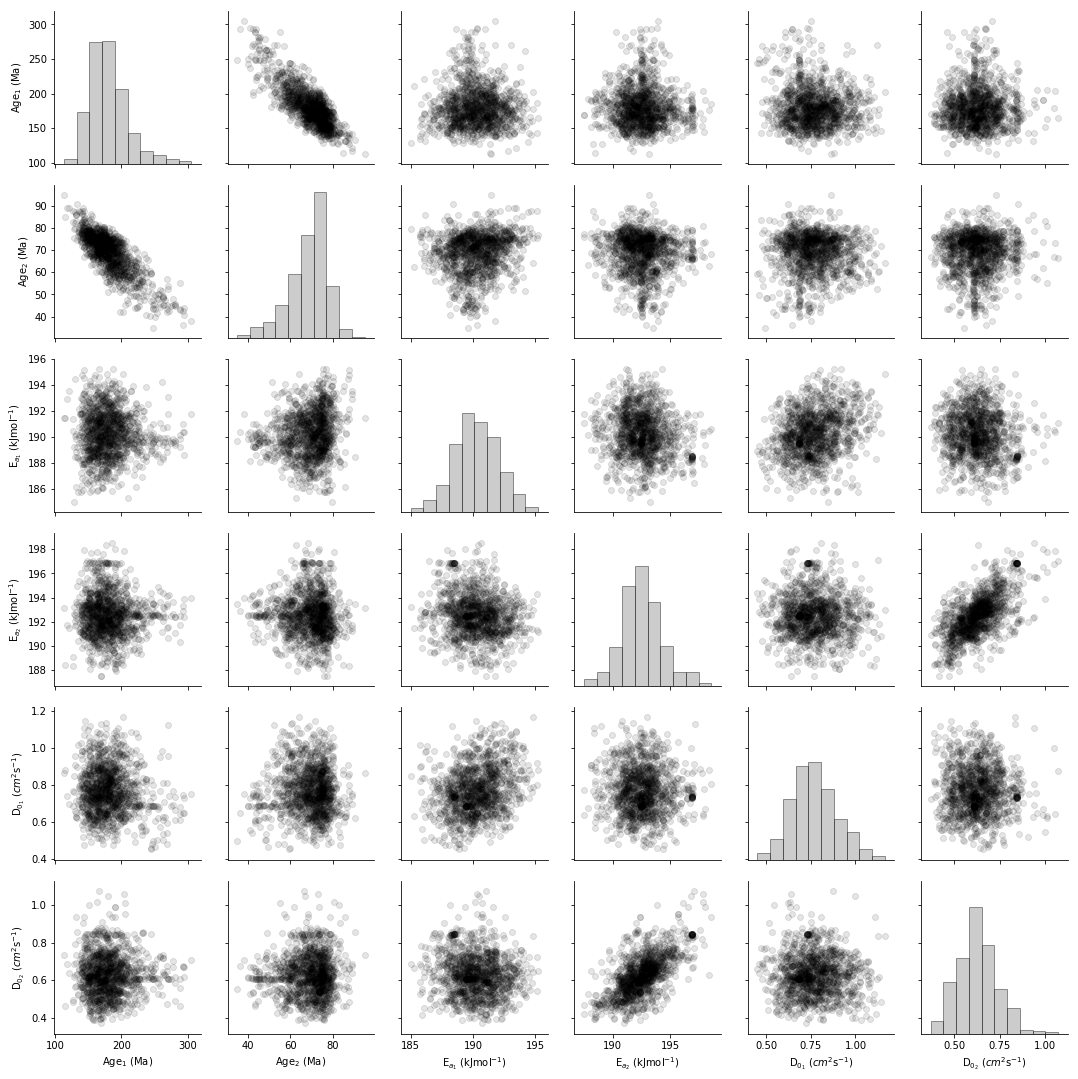

In [8]:
# PairGrid
g = sns.PairGrid(dfp[-5000::4])

g.map_diag(plt.hist, facecolor = 'grey', 
          edgecolor = 'k', 
          alpha = 0.4)

#g.map_diag(sns.kdeplot, 
#          lw = 3, color = 'k')

g.map_offdiag(plt.scatter, 
             alpha = 0.1, 
             color = 'k')

#Y axis label
g.axes[0,0].set_ylabel('Age$_{1}$ (Ma)');
g.axes[1,0].set_ylabel('Age$_{2}$ (Ma)');
g.axes[2,0].set_ylabel('E$_{a_1}$ (kJmol$^{-1}$)');
g.axes[3,0].set_ylabel('E$_{a_2}$ (kJmol$^{-1}$)');
g.axes[4,0].set_ylabel('D$_{0_1}$ ($cm^{2}$s$^{-1}$)');
g.axes[5,0].set_ylabel('D$_{0_2}$ ($cm^{2}$s$^{-1}$)');



# X axis label 
g.axes[5,0].set_xlabel('Age$_{1}$ (Ma)');
g.axes[5,1].set_xlabel('Age$_{2}$ (Ma)');
g.axes[5,2].set_xlabel('E$_{a_1}$ (kJmol$^{-1}$)');
g.axes[5,3].set_xlabel('E$_{a_2}$ (kJmol$^{-1}$)');
g.axes[5,4].set_xlabel('D$_{0_1}$ ($cm^{2}$s$^{-1}$)');
g.axes[5,5].set_xlabel('D$_{0_2}$ ($cm^{2}$s$^{-1}$)');

plt.savefig('kula_biotite_pairgrid_3.pdf')

In [9]:
dfx = df[-5000::4]
dfx.to_csv('kula3biotite_final.csv')